# Shark Attack

<br>

### Convert to an appropriate colourspace to exaggerate the fish/sea difference
### Enhance the images to increase contrast and definition
### Enhance the fish portion of the image
### Automatically crop and rotate the image to contain only the fish
### The final image should be an enhanced image of the fish with a clean minimal background


Original


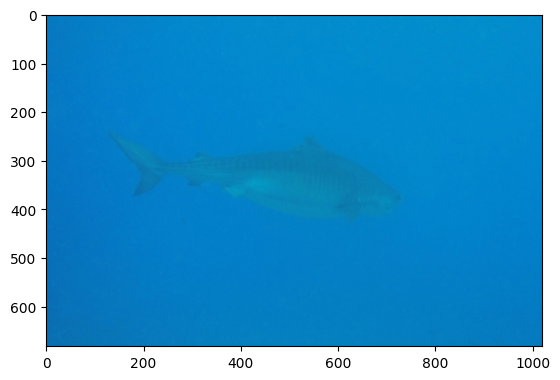

Sharp


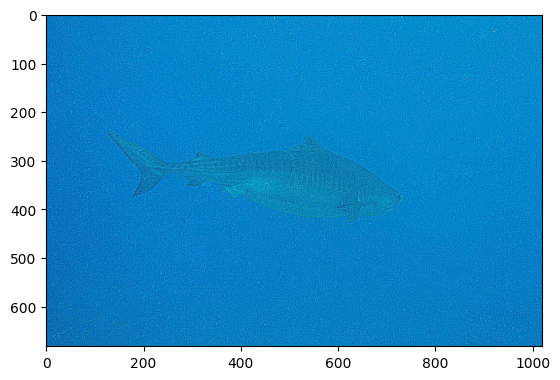

Greyscale


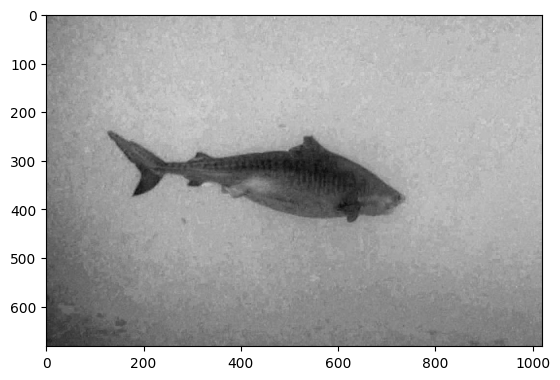

Denoised


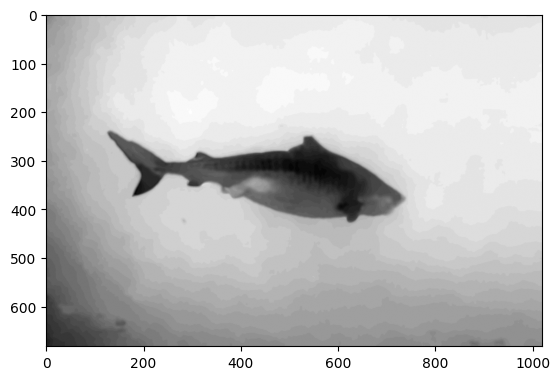

Contrasted
136.49142947501582


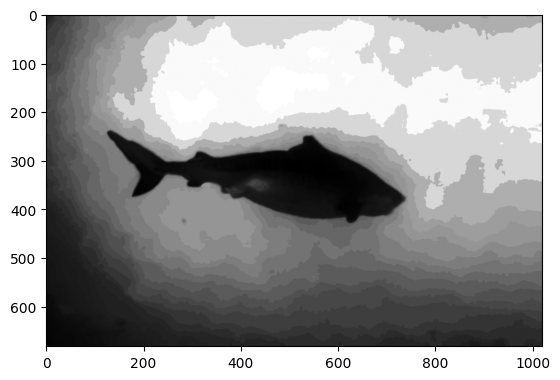

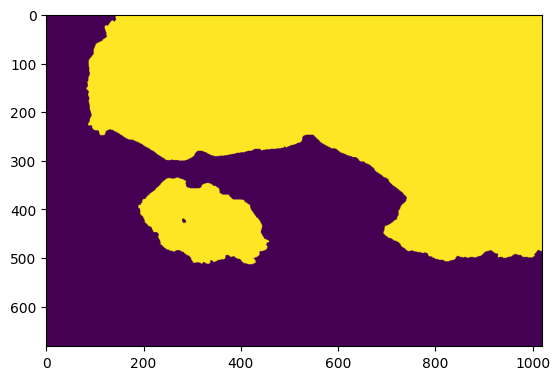

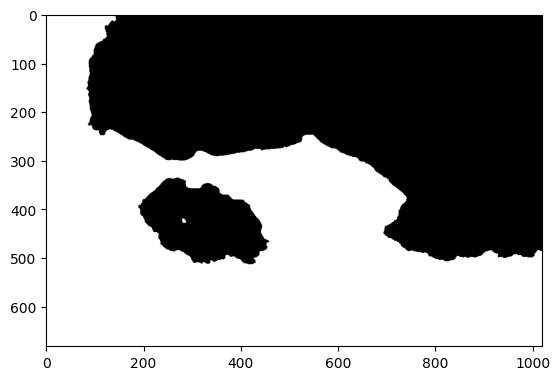

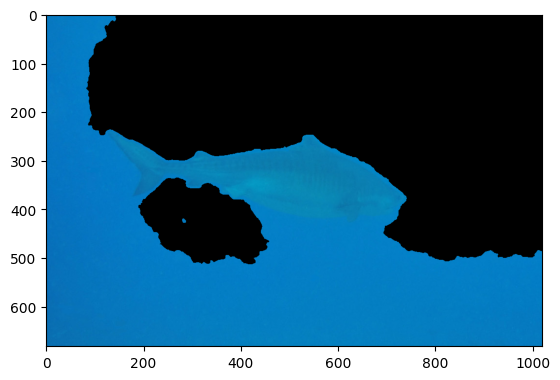

In [2]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

I = cv2.imread('Shark 1.PNG')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

Original = I.copy()

print("Original")
plt.imshow(I)

k = np.array([[-2,-4,-2], [-4,25,-4], [-2,-4,-2]], dtype=float)
#k = np.array([[-1,-2,-1], [-2,13,-2], [-1,-2,-1]], dtype=float)

sharp = cv2.filter2D(I,ddepth=-1,kernel=k)

plt.show()
print("Sharp")
plt.imshow(sharp)

sharp = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(sharp)

plt.show()
print("Greyscale")
plt.imshow(V, cmap="gray")

dst = cv2.fastNlMeansDenoising(V,None,3,9,35)

plt.show()
print("Denoised")
plt.imshow(dst, cmap="gray")

EV = cv2.equalizeHist(dst)

plt.show()
print("Contrasted")
plt.imshow(EV, cmap="gray")

avg = np.average(EV)

print(avg)

EV[EV >= avg]= 255
EV[EV < avg] = 0

plt.show()
plt.imshow(EV)

EV = cv2.merge((EV, EV, EV))

EV = cv2.bitwise_not(EV)

EV = cv2.cvtColor(EV, cv2.COLOR_BGR2RGB)

plt.show()
plt.imshow(EV)

weightedImg = cv2.bitwise_and(EV, Original)

plt.show()
plt.imshow(weightedImg)

